# Принятие бизнес-решений на основе данных в интернет-магазине

`Заказчик`: отдел маркетинга крупного интернет-магазина.  

`Входные данные`: 1) подготовленный с отделом маркетинга список гипотез для увеличения выручки с указанными параметрами Reach, Impact, Confidence, Effort. 2) результаты проведенного A/B-теста в виде данных о визитах и заказах.  

`Задачи`: 1) Приоритизировать гипотезы; 2) запустить A/B-тест и проанализировать его результаты

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Графики-кумулятивной-выручки" data-toc-modified-id="Графики-кумулятивной-выручки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Графики кумулятивной выручки</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>График кумулятивного среднего чека по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивной-конверсии-по-группам" data-toc-modified-id="График-кумулятивной-конверсии-по-группам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>График кумулятивной конверсии по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>График относительного изменения кумулятивной конверсии группы B к группе A</a></span></li><li><span><a href="#Выявление-аномалий,-анализ-выбросов" data-toc-modified-id="Выявление-аномалий,-анализ-выбросов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выявление аномалий, анализ выбросов</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«сырым»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«сырым»-данным-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Расчет статистической значимости различий в конверсии между группами по «сырым» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«очищенным»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«очищенным»-данным-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Расчет статистической значимости различий в конверсии между группами по «очищенным» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Результаты-A/B-теста" data-toc-modified-id="Результаты-A/B-теста-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Результаты A/B-теста</a></span></li></ul></li></ul></div>

## Приоритизация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
%matplotlib inline
import seaborn as sns
sns.set()

Уберем прокрутку вывода результатов ячейки

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Рассмотрим датасет с гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
pd.set_option("max_colwidth", 120)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Видим 9 гипотез с оценками параметров. Оценка параметров произведена по 10-балльной шкале.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()



**Приоритизация гипотез посредством фреймворка ICE**  

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.  

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [7]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Гипотеза №8 — самая перспективная. Затем идут гипотезы 0, 7 и 6.  

Посмотрим, в какой приоритетности расположатся гипотезы при применении фреймворка RICE.  

**Приоритизация гипотез посредством фреймворка RICE**  
  
  
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$  
  


In [8]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [9]:
hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


При использовании фреймворка RICE наиболее перспективной является гипотеза 7, так как ее охват пользователей - максимальный среди всех остальных гипотез.   
Гипотезы 0,6 как и при фреймворке ICE вверху списка. Также вверх списка поднялась гипотеза 2, ее параметр охвата пользователей тоже оценен достаточно высоко, сравнительно выше других.  
Гипотеза 8, которая была наиболее перспективной по ICE ушла в середину списка, так как ее охват пользователей минимальный среди всех гипотез. 

## Анализ A/B-теста  

Рассмотрим результаты проведенного A/B-теста, представленные в виде данных о визитах и заказах, и проанализируем его.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
798,2291957725,2188683977,2019-08-05,5719,A
274,3404861334,467022501,2019-08-23,1100,A
33,486237576,2378935119,2019-08-15,1650,A


In [13]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [14]:
orders.columns = ['transaction_id', 'customer_id', 'date', 'revenue', 'group']

In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим датасет на наличие покупателей, которые попали в обе группы

In [16]:
orders_a = orders[orders['group'] == 'A']['customer_id'].unique()
orders_b = orders[orders['group'] == 'B']['customer_id'].unique()

both_group_customers = []
for customer_id in orders_b:
    if customer_id in orders_a:
        both_group_customers.append(customer_id)

In [17]:
len(both_group_customers)

58

In [18]:
len(orders[~orders['customer_id'].isin(both_group_customers)])/len(orders)

0.8487886382623224

58 покупателей попали в обе группы. Они составляют 15% заказов в датасете. Исключим их

In [19]:
orders = orders[~orders['customer_id'].isin(both_group_customers)]

Создадим массив уникальных пар значений дат и групп теста:

In [20]:
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups.head(6)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B


Соберём агрегированные кумулятивные по дням данные о заказах:

In [21]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
    agg({'date':'max', 'group':'max', 'transaction_id': pd.Series.nunique,'customer_id':pd.Series.nunique,
        'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
orders_aggregated.head(6)

,date,group,transaction_id,customer_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850


In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
visitors.sample(3)

,date,group,visitors
58,2019-08-28,B,654
40,2019-08-10,B,369
55,2019-08-25,B,679


In [24]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [25]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
    agg({'date':'max', 'group':'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Составим общую таблицу с куммулятивными данными о заказах и постетителях:

In [26]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


### Графики кумулятивной выручки

Разделим данные на датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням по группам:

In [27]:
cumulative_revenue_a = cumulative_data.loc[cumulative_data['group'] == 'A', ['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data.loc[cumulative_data['group'] == 'B', ['date', 'revenue', 'orders']]

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [28]:
def plot_creator(df1, df2, x_column, y_column, label1, label2, y0, y1, title):
    plt.plot(df1[x_column], df1[y_column], label=label1)
    plt.plot(df2[x_column], df2[y_column], label=label2)
    plt.legend()
    plt.axis(['2019-08-01', '2019-08-31', y0, y1])
    plt.xticks(rotation=50)
    plt.title(title)

In [29]:
def max_value(df1, df2, column):
    if df1[column].max() > df2[column].max():
        return df1[column].max()
    else:
        return df2[column].max()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


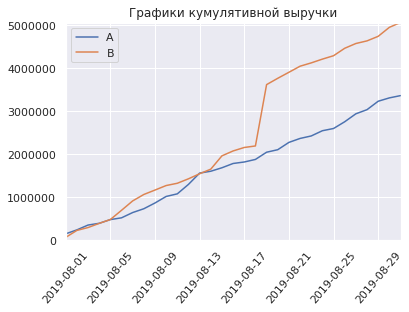

In [30]:
plot_creator(cumulative_revenue_a, cumulative_revenue_b, 'date', 'revenue', 
             'A', 'B', 0, max_value(cumulative_revenue_a, cumulative_revenue_b, 'revenue'), 'Графики кумулятивной выручки')

Выручка группы А почти равномерно увеличивается в течение всего теста.  
А у графика группы В есть точка резкого роста выручки. Это может сигнализировать о наличии выбросов в группе В, таких как всплески числа заказов, наличие очень дорогих заказов в выборке. За счет этого сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы повлияли на результаты.  
Необходимо провести анализ на наличие выбросов.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам

In [31]:
cumulative_revenue_a['avg_check'] = cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders']
cumulative_revenue_b['avg_check'] = cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders']

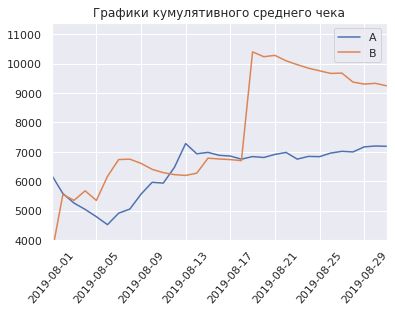

In [32]:
plot_creator(cumulative_revenue_a, cumulative_revenue_b, 'date', 'avg_check', 
             'A', 'B', 4000, max_value(cumulative_revenue_a, cumulative_revenue_b, 'avg_check')+1000, 'Графики кумулятивного среднего чека')

Всплеск на графике кумулятивной выручки в группе В еще ярче просматривается на графике кумулятивного среднего чека. За счет чего группа В во второй половине теста показывает значения значительно выше, чем группа А. Средний чек группы А становится равномерным ближе к концу теста, а в группе В падает после всплеска. Вероятно, на график группы B значительно влияют крупные заказы, обусловившие резкий всплеск на графике. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Объединим данные группы А и В

In [33]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_A','_B'])
merged_cumulative_revenue.head()

,date,revenue_A,orders_A,avg_check_A,revenue_B,orders_B,avg_check_B
0,2019-08-01,142779,23,6207.782609,59758,17,3515.176471
1,2019-08-02,234381,42,5580.500000,221801,40,5545.025000
2,2019-08-03,346854,66,5255.363636,288850,54,5349.074074
3,2019-08-04,388030,77,5039.350649,385740,68,5672.647059
4,2019-08-05,474413,99,4792.050505,475648,89,5344.359551


Построим график относительного различия для среднего чека.

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

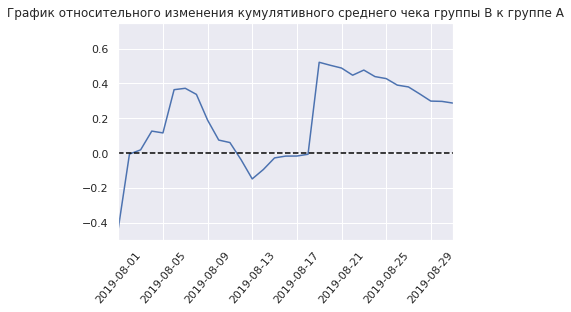

In [34]:
plt.plot(merged_cumulative_revenue['date'], 
         merged_cumulative_revenue['avg_check_B']/merged_cumulative_revenue['avg_check_A']-1)
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.75])
plt.xticks(rotation=50)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

В нескольких точках график различия между сегментами значительно и резко менятется. Вероятно, такие изменения обусловлены совершением аномальных заказов в эти даты. Необходим анализ данных на выбросы.

### График кумулятивной конверсии по группам

Построим и проанализируем график кумулятивной конверсии по группам.  

Рассчитаем конверсию:

In [35]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

Разделим данные на группы и построим графики:

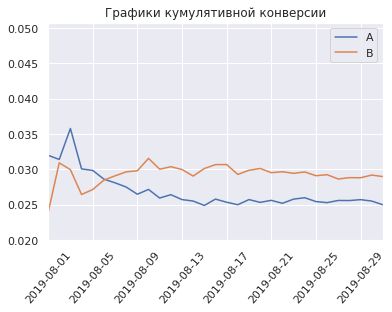

In [36]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plot_creator(cumulative_data_a, cumulative_data_b, 'date', 'conversion', 
             'A', 'B', 0.02, max_value(cumulative_data_a, cumulative_data_b, 'conversion')+0.015, 
             'Графики кумулятивной конверсии')

В первой части теста заметны колебания графиков. Но затем довольно быстро графики становятся относительно равномерными, конверсии групп фиксируются. Выбранный масштаб позволяеит заметить, что почти на всем протяжении теста показатели конверсии группы В выше показателей группы А. 

### График относительного изменения кумулятивной конверсии группы B к группе A

Объединим данные по конверсиям групп в один датафрейм:

In [37]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_A','_B'])
merged_cumulative_conversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Построим график относительного различия кумулятивных конверсий:

Text(0.5, 1.0, 'График  относительного изменения кумулятивной конверсии группы B к группе A')

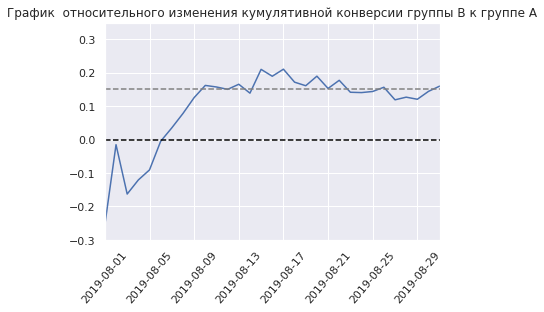

In [38]:
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_B']/merged_cumulative_conversions['conversion_A']-1)
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.35])
plt.xticks(rotation=50)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График  относительного изменения кумулятивной конверсии группы B к группе A')

В начале теста график относительного изменения коверсий сильно менялся, затем постпенно установилось лидерство группы В по конверсии, которое возможно зафиксируется около прироста в 15% относительно группы A. Впрочем, влияние аномалий на этот график тоже нужно оценить. 

### Выявление аномалий, анализ выбросов

- **Точечный график количества заказов по пользователям**

In [39]:
orders.head(2)

,transaction_id,customer_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


Найдем число заказов по пользователям 

In [40]:
orders_by_buyers = orders.drop(['date', 'revenue', 'group'], axis=1)\
    .groupby('customer_id', as_index=False)\
    .agg({'transaction_id': pd.Series.nunique})

orders_by_buyers.columns = ['customer_id', 'orders']

orders_by_buyers.head()

,customer_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [41]:
def scatterplot_creator(df, column, title):
    x_values = pd.Series(range(0, len(df[column])))
    plt.scatter(x_values, df[column])
    plt.title(title)

Изучим точечный график количества заказов по пользователям

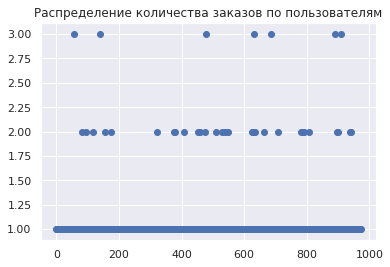

In [42]:
scatterplot_creator(orders_by_buyers, 'orders', 'Распределение количества заказов по пользователям')

Большинство покупателей заказывали только один раз. Доля пользователей с 2 заказами тоже незначительна. Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными.  Необходимо посчитать и оценить выборочные перцентили.

- **Рассчет 95-го и 99-го перцентилей количества заказов на пользователя**

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [43]:
print(np.percentile(orders_by_buyers['orders'], [95, 99]))

[1. 2.]


In [44]:
len(orders_by_buyers[orders_by_buyers['orders'] >= 2])

36

Судя по точечному графику распределения заказов, 3 и 2 заказа делают совсем немного пользователей. Установим границу аномалий  в 1 заказ, т.е. все что выше 1го заказа будем считать аномалией.

- **Точечный график стоимостей заказов**

Изучим точечный график стоимостей заказов

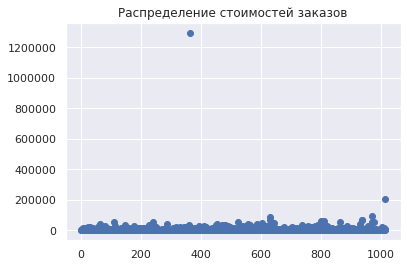

In [45]:
scatterplot_creator(orders, 'revenue', 'Распределение стоимостей заказов')

По такому точечному графику сложно сделать выводы. Основная доля заказов точно сосредоточна в диапазоне до 200000.  Посчитаем выборочные персентили и снова посмотрим на точечный график, ограничив верхнюю границу стоимости заказа.

- **Рассчет 95-го и 99-го перцентилей стоимости заказов**

In [46]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Оказывается, 99% заказов лежит в диапазоне до 60000. Посмотрим еще раз на точечный график, чтобы определиться с границей стоимости аномальных заказов:

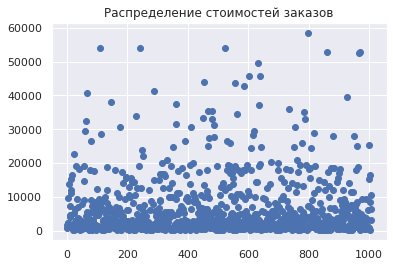

In [47]:
new_orders = orders[orders['revenue'] <= 60000]
scatterplot_creator(new_orders, 'revenue', 'Распределение стоимостей заказов')

Установим границу в 30000. Выше этой суммы заказы встречаются редко.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

In [48]:
display(visitors.sample(3))
display(orders.sample(2))

,date,group,visitors
49,2019-08-19,B,487
20,2019-08-21,A,646
21,2019-08-22,A,609


,transaction_id,customer_id,date,revenue,group
403,2890964573,3704741858,2019-08-28,460,B
176,1791477067,3261022559,2019-08-02,995,B


Найдем **количество визитов**  в кажой группе по дням и нарастающим итогом

In [49]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date','visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

display(visitors_A_daily.head(3))

visitors_A_cumulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_A':'sum'}),
    axis=1
)

visitors_A_cumulative.columns = ['date', 'visitors_cummulative_A']

display(visitors_A_cumulative.head(3))

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507


,date,visitors_cummulative_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845


In [50]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date','visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

display(visitors_B_daily.head(3))

visitors_B_cumulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_B':'sum'}),
    axis=1
)

visitors_B_cumulative.columns = ['date', 'visitors_cummulative_B']

display(visitors_B_cumulative.head(3))

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509


,date,visitors_cummulative_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803


Найдем **количество заказов** и **суммарную выручку** в каждой группе по дням и нарастающим итогом

In [51]:
orders_A_daily = (
    orders[orders['group'] == 'A'][['date','transaction_id','customer_id','revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
)

orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

display(orders_A_daily.head(3))

orders_A_cumulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_A':'sum', 'revenue_per_date_A':'sum'}),
    axis=1
).sort_values(by='date')

orders_A_cumulative.columns = ['date', 'orders_cumulative_A', 'revenue_cumulative_A']

display(orders_A_cumulative.head(3))

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473


,date,orders_cumulative_A,revenue_cumulative_A
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854


In [52]:
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'customer_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue':'sum'})
)

orders_B_daily.columns = ['date','orders_per_date_B','revenue_per_date_B']

display(orders_B_daily.head(3))

orders_B_cumulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_B':'sum', 'revenue_per_date_B':'sum'}),
    axis=1
).sort_values(by='date')

orders_B_cumulative.columns = ['date', 'orders_cumulative_B', 'revenue_cumulative_B']

display(orders_B_cumulative.head(3))

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049


,date,orders_cumulative_B,revenue_cumulative_B
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850


Cоберем все данные по дням в одну таблицу

In [53]:
data = (
    orders_A_daily.merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_A_cumulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cumulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cumulative_A,revenue_cumulative_A,orders_cumulative_B,revenue_cumulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


В каждой группе найдем количество заказов для каждого покупателя

In [54]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('customer_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)

orders_by_users_A.columns = ['customer_id', 'orders']


orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('customer_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)

orders_by_users_B.columns = ['customer_id', 'orders']

display(orders_by_users_A.head(3))
display(orders_by_users_B.head(3))

,customer_id,orders
0,11685486,1
1,54447517,1
2,66685450,1


,customer_id,orders
0,5114589,1
1,6958315,1
2,39475350,1


Создадим объектs Series для каждой группы, где будут только количества заказов по покупавшим пользователям и нули по всем остальным.

In [55]:
sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
            name='orders',   
        ),
        ],
        axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_date_B'].sum()-len(orders_by_users_B['orders'])),
            name='orders',
    ),
    ],
    axis=0
)


Для определения метода рассчета статистической значимости различий в конверсии между группами по «сырым» данным проверим имеющиеся данные на нормальность распределения при помощи критерия Шапиро-Уилка.

Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [56]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_A)
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение количества заказов в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение количества заказов в группе А нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение количества заказов в группе А не нормально


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_B)
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение количества заказов в группе B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение количества заказов в группе B нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение количества заказов в группе B не нормально


Так как распределения не являются нормальными, рассчет статистической значимости различий в конверсии между группами по «сырым» данным произведем с помощью теста Манна-Уитни. 
Так как альтернативная гипотеза в нашем случае двусторонняя (т.е. утверждает, что параметр просто не равен значению, заданному нулевой гипотезой, он может быть либо больше, либо меньше этого значения), будем использовать в тесте параметр `alternative="two-sided"`.  
Также вычислим относительное различие в конверсии между группами.  

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - статистически значимых отличий в конверсии между группами нет.  
Альтернативная (H1) - между группами есть статистически значимые отличия в конверсии.  

In [58]:
print('p-value = {0:.5f}'.format(st.mannwhitneyu(sample_A, sample_B, alternative="two-sided")[1]))

print('Относительное отличие конверсий = {0:.1%}'.format((data['orders_per_date_B'].sum()/data['visitors_per_date_B'].sum())/(data['orders_per_date_A'].sum()/data['visitors_per_date_A'].sum())-1))


p-value = 0.01102
Относительное отличие конверсий = 16.0%


p-value меньше 0.05, потому нулевую гипотезу об отсутствии между группами статистически значимых отличий в конверсии  отвергаем. 
Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 16%.

Необходимо оценить, как изменятся результаты анализа после удаления выбросов.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим имеющиеся данные на нормальность распределения при помощи критерия Шапиро-Уилка.

Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [59]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в группе А нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе А не нормально


In [60]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в группе B нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе B не нормально


Распределения не являются нормальными, рассчет статистической значимости различий в среднем чеке между группами по «сырым» данным произведем с помощью теста Манна-Уитни для двусторонней альтернативной гипотезы `alternative="two-sided"`.  
Также вычислим относительное различие в среднем чеке между группами.  

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - статистически значимых отличий в среднем чеке между группами нет.  
Альтернативная (H1) - между группами есть статистически значимые отличия в среднем чеке.  

Передадим критерию `mannwhitneyu()` данные о выручке с заказов, чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами 

In [61]:
print('p-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]))
print('Относительное отличие средних чеков = {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Относительное отличие средних чеков = 28.7%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Но средний чек группы B значительно, на 28.7% выше среднего чека группы A.  

Необходимо оценить, как изменятся результаты анализа после удаления выбросов.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Рассчитанные 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Составим срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 30 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.

In [62]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 1]['customer_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 1]['customer_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 30000]['customer_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users.head(3)

1099    148427295
928     204675465
33      249864742
Name: customer_id, dtype: int64

Узнаем, сколько всего аномальных пользователей

In [63]:
abnormal_users.shape

(77,)

Оценим, какое влияние на результаты теста окажет исключение 77 пользователей. Создадим очищенные выборки количества заказов по пользователям по группам теста

In [64]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['customer_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['customer_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0
)

Проверим имеющиеся "очищенные" данные на нормальность распределения при помощи критерия Шапиро-Уилка.

Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [65]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_A_filtered)
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение количества заказов в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение количества заказов в группе А нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение количества заказов в группе А не нормально


In [66]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_B_filtered)
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение количества заказов в группе B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение количества заказов в группе B нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение количества заказов в группе B не нормально


Распределения не являются нормальными, рассчет статистической значимости различий в конверсии между группами по «очищенным» данным произведем с помощью теста Манна-Уитни для двусторонней альтернативной гипотезы `alternative="two-sided"`.  
Также вычислим относительное различие в конверсии между группами.  

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - статистически значимых отличий в конверсии между группами нет.  
Альтернативная (H1) - между группами есть статистически значимые отличия в конверсии.  


In [67]:
print('p-value = {0:.5f}'.format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative="two-sided")[1]))
print('Относительное отличие конверсий = {0:.1%}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

p-value = 0.01255
Относительное отличие конверсий = 18.0%


Как и в случае с сырыми данными, статистическая значимость достигнута, p-value меньше 0,05, потому нулевую гипотезу об отсутствии между группами статистически значимых отличий в конверсии  отвергаем. Результаты теста показывают, что конверсия сегмента B лучше сегмента A. Об этом также свидетельствует относительный прирост конверсии группы B к конверсии группы A, который равен 18%.


### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Проверим имеющиеся данные на нормальность распределения при помощи критерия Шапиро-Уилка.

Нулевая гипотеза h0 - распределение нормально.  
Альтернативная h1 - распределение не нормально.

In [68]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['customer_id'].isin(abnormal_users)),
                )
            ]['revenue'])
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в группе А нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе А не нормально


In [69]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['customer_id'].isin(abnormal_users)),
                )
            ]['revenue'])
p_value = results[1]

print('p-значение = {0:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение данных о выручке с заказов в группе B нормально') 

p-значение = 0.00000
Отвергаем нулевую гипотезу: распределение данных о выручке с заказов в группе B не нормально


Распределения не являются нормальными, рассчет статистической значимости различий в среднем чеке между группами по «очищенным» данным произведем с помощью теста Манна-Уитни для двусторонней альтернативной гипотезы `alternative="two-sided"`.  
Также вычислим относительное различие в среднем чеке между группами.  

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - статистически значимых отличий в среднем чеке между группами нет.  
Альтернативная (H1) - между группами есть статистически значимые отличия в среднем чеке.  


Рассчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей

In [70]:
print(
    'p-value = {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['customer_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['customer_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            alternative="two-sided"
        )[1]
    )
)

print(
    "Относительное отличие средних чеков = {0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['customer_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['customer_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.829
Относительное отличие средних чеков = -1.1%


Относительное отличие среднего чека между группами снизилось с 25,9% до -1,1%.  Видим, как сильно влияли выбросы на относительное отличие групп по чеку.  P-value по-прежнему значительно больше 0,05. Значит, по-прежнему нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.

### Результаты A/B-теста

По результатам теста отмечены следующие факты:  
- Между группами **есть** статистически значимое **различие по конверсии** как по "сырым" данным, так и после фильтрации аномалий.  
- **Нет** статистически значимого **различия по среднему чеку** между группами ни по «сырым», ни по данным после фильтрации аномалий.  
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: колебания графика зафиксировались около значения 15%. Это подверждается рассчитанным относительный прирост конверсии группы B к конверсии группы A после исключения аномалий
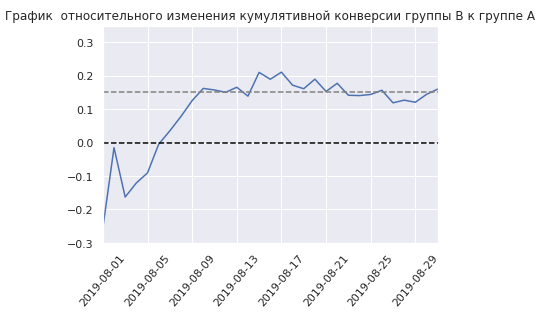

- График различия среднего чека колеблется, малоиформативен, определенные выводы из него сложно сделать. Разве что отметить, что в данных есть аномалии.
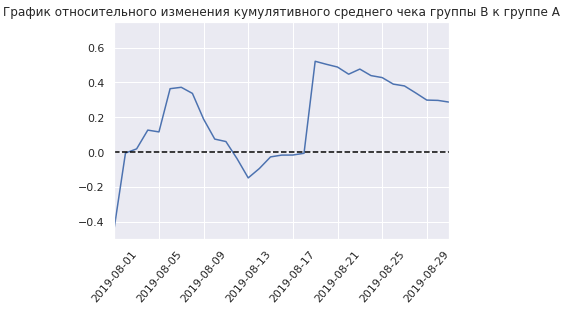

**ВЫВОД**:  
Исходя из обнаруженных фактов, тест следует остановить и признать успех группы В по отношению к группе А по конверсии. Но следует принять во внимание, что отличий по среднему чеку в группах нет. То есть увеличение выручки интернет-магазина будет возможно только за счет возросшей конверсии. 